In [1]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
data = pd.read_csv("messages.csv", encoding = "latin-1")

In [3]:
print ('Shape = >',data.shape)

Shape = > (2893, 3)


In [4]:
print ('ham and spam counts','\n',data.label.value_counts())

ham and spam counts 
 0    2412
1     481
Name: label, dtype: int64


In [5]:
#Ratio
print ('spam ratio = ', round(len(data[data['label']=='spam']) / len(data.label),2)*100,'%')
print ('ham ratio  = ', round(len(data[data['label']=='ham']) / len(data.label),2)*100,'%')

spam ratio =  0.0 %
ham ratio  =  0.0 %


In [6]:
#New column for Length of message
data['length'] = data.message.str.len()
data.head(2)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800


In [7]:
data.dropna()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492
...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,262
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,2163
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,1039
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0,2949


In [8]:
data["label"]=data["label"].replace({0:'ham',1:'spam'})

In [9]:
data.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,ham,2856
1,NaN,"lang classification grimes , joseph e . and ba...",ham,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,ham,1435
3,risk,a colleague and i are researching the differin...,ham,324
4,request book information,earlier this morning i was on the phone with a...,ham,1046


In [10]:
data['information']= data["subject"].astype(str) +" "+ data["message"].astype(str) 
print(data)

                                                subject  \
0               job posting - apple-iss research center   
1                                                   NaN   
2     query : letter frequencies for text identifica...   
3                                                  risk   
4                              request book information   
...                                                 ...   
2888                       love your profile - ysuolvpv   
2889                 you have been asked to join kiddin   
2890                 anglicization of composers ' names   
2891  re : 6 . 797 , comparative method : n - ary co...   
2892               re : american - english in australia   

                                                message label  length  \
0     content - length : 3386 apple-iss research cen...   ham    2856   
1     lang classification grimes , joseph e . and ba...   ham    1800   
2     i am posting this inquiry for sergei atamas ( ...   ham    1435   

In [11]:
data.drop('message',axis=1,inplace=True)
data.drop('subject',axis=1,inplace=True)
data.head()

,label,length,information
0,ham,2856,job posting - apple-iss research center conten...
1,ham,1800,"nan lang classification grimes , joseph e . an..."
2,ham,1435,query : letter frequencies for text identifica...
3,ham,324,risk a colleague and i are researching the dif...
4,ham,1046,request book information earlier this morning ...


In [12]:
# New column (clean_length) after puncuations,stopwords removal
data['clean_length'] = data.information.str.len()
data.head()

,label,length,information,clean_length
0,ham,2856,job posting - apple-iss research center conten...,2896
1,ham,1800,"nan lang classification grimes , joseph e . an...",1804
2,ham,1435,query : letter frequencies for text identifica...,1486
3,ham,324,risk a colleague and i are researching the dif...,329
4,ham,1046,request book information earlier this morning ...,1071


In [13]:
# Total length removal
print ('Origian Length',data.length.sum())
print ('Clean Length', data.clean_length.sum())

Origian Length 9344743
Clean Length 9439485


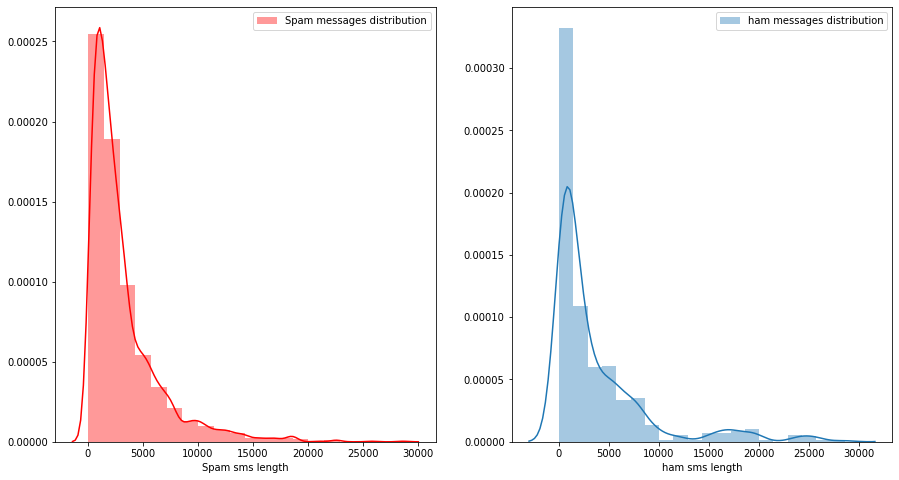

In [14]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(data[data['label']=='ham']['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(data[data['label']=='spam']['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

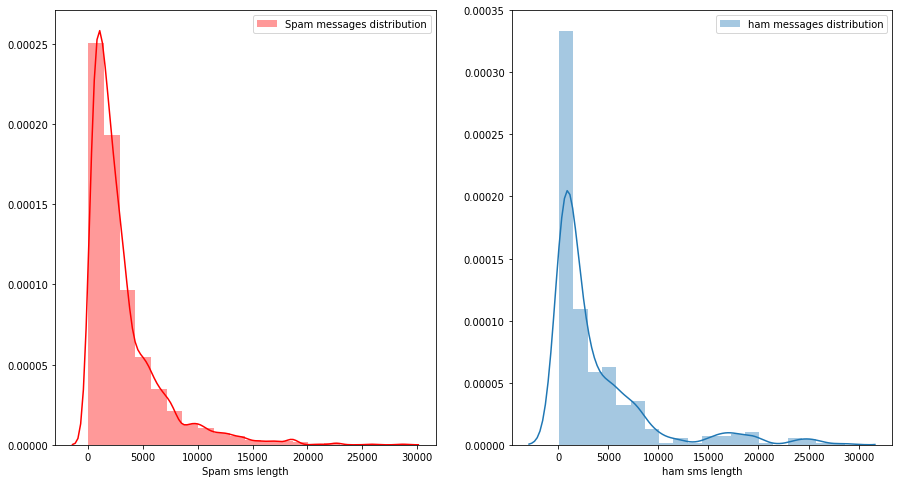

In [15]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(data[data['label']=='ham']['clean_length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(data[data['label']=='spam']['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

In [16]:
import wordcloud

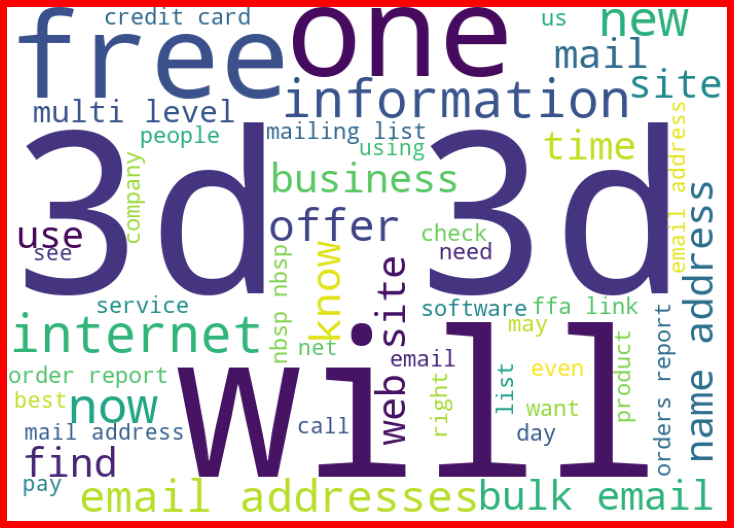

In [17]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = data['information'][data['label']=='spam']

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

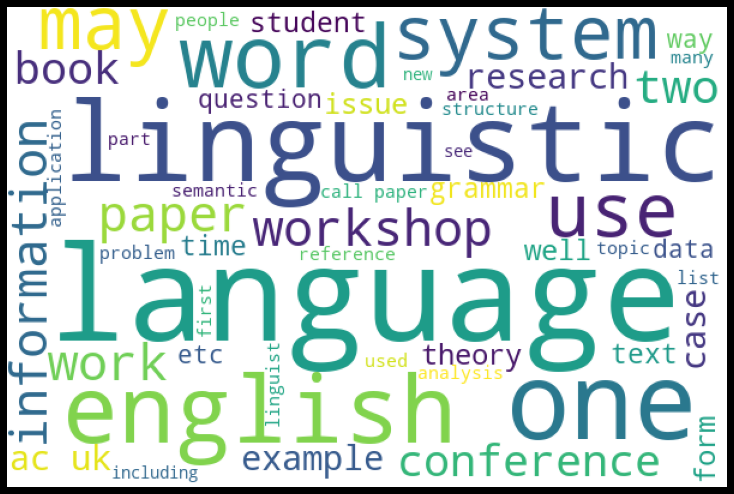

In [19]:
#Getting sense of loud words in ham 

hams = data['information'][data['label']=='ham']
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [20]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(data['information'])

X = features
y = data['label']

In [21]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.81353591160221


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.81      1.00      0.90       585
        spam       1.00      0.03      0.06       139

    accuracy                           0.81       724
   macro avg       0.91      0.51      0.48       724
weighted avg       0.85      0.81      0.74       724



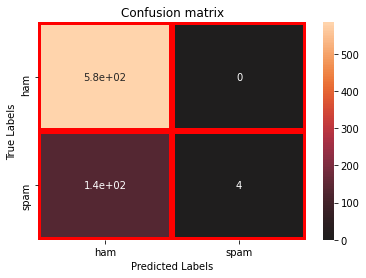

In [23]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['ham','spam'])
ax.yaxis.set_ticklabels(['ham','spam'])
plt.show()

In [24]:
conf_mat

array([[585,   0],
       [135,   4]], dtype=int64)